In [1]:
!python -m pip install --upgrade pip

In [1]:
!pip cache purge

Files removed: 1199 (843.9 MB)
Directories removed: 5


In [2]:
!pip install sentence-transformers scikit-learn pymupdf spacy matplotlib

In [3]:
import fitz
import re
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import matplotlib

print("All libraries working ")


All libraries working 


In [4]:
!pip install ipywidgets

In [5]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 3.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.6/12.8 MB 3.5 MB/s eta 0:00:04
     ------- -------------------------------- 2.4/12.8 MB 3.8 MB/s eta 0:00:03
     ---------- ----------------------------- 3.4/12.8 MB 4.1 MB/s eta 0:00:03
     ------------- -------------------------- 4.5/12.8 MB 4.3 MB/s eta 0:00:02
     ----------------- ---------------------- 5.5/12.8 MB 4.4 MB/s eta 0:00:02
     ------------------- -------------------- 6.3/12.8 MB 4.4 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.8 MB 4.3 MB/s eta 0:00:02
     ----------------------- ---------------- 7.6/12.8 MB 4.1 MB/s eta 0:00:02
     -------------------------- ------------- 8.4/12.8 MB 4.0 MB/s eta 0:00:02
     --------------------------- ------------ 8.9/12.8 MB 4.0 MB/s

In [6]:
#PHASE 1 — Environment Setup (Foundation)
import fitz
import re
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import matplotlib.pyplot as plt
print("All libraries working ")


All libraries working 


In [7]:
#PHASE 2 — Data Extraction Layer
#Step 1 — PDF Extraction Function
def extract_text_from_pdf(my_resume):
    doc = fitz.open(my_resume)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

In [8]:
#Step 2 — Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [9]:
#Testing it by uploading resume and run 
resume_text = extract_text_from_pdf("Black and White Clean Professional A4 Resume.pdf")
resume_text = clean_text(resume_text)

print(resume_text[:8000])


1aibased financial fraud detection system developed a machine learningbased system to detect fraudulent financial transactions by analyzing transaction patterns implemented data preprocessing handled class imbalance and trained classification models to improve fraud detection accuracy and reduce false positives 2resume screening job matching system built an nlpbased resume screening system that automatically analyzes resumes and matches them with job descriptions used text preprocessing and similarity techniques to rank candidates helping reduce manual effort in the hiring process 3customer churn prediction system created a machine learningbased customer churn prediction system using historical customer data such as usage patterns payment behavior and service details performed data cleaning feature analysis and trained classification models to predict whether a customer is likely to leave the service identified key factors influencing churn and generated insights to help businesses tak

In [10]:
#PHASE 3 — Skill Extraction Layer
#Step 1 — Skill Dictionary
SKILL_LIST = [
    "python", "java", "machine learning",
    "deep learning", "sql", "aws",
    "docker", "tensorflow", "pandas",
    "numpy", "react", "fastapi"
]

In [11]:
#Step 2 — Skill Extractor
def extract_skills(text):
    found_skills = []
    for skill in SKILL_LIST:
        if skill in text:
            found_skills.append(skill)
    return list(set(found_skills))

In [12]:
#Step 3 — Test Resume Skills
resume_skills = extract_skills(resume_text)
print("Resume Skills:", resume_skills)


Resume Skills: ['pandas', 'python', 'sql', 'machine learning', 'java', 'numpy']


In [13]:
#PHASE 4 — Core ML Layer (Semantic Matching)
#Step 1 — Load Transformer Model
model = SentenceTransformer('all-MiniLM-L6-v2')

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [27]:
#Step 2 — Create Match Score Function
def calculate_match_score(resume_text, jd_text):
    resume_embedding = model.encode(resume_text)
    jd_embedding = model.encode(jd_text)
    score = cosine_similarity([resume_embedding], [jd_embedding])[0][0]
    return round(score * 100, 2)


In [28]:
#Step 3 — Test With Job Description
job_description = """
Looking for a Machine Learning Engineer with experience in Python,
Deep Learning, AWS, and Docker. Knowledge of SQL is required.
"""
jd_text = clean_text(job_description)
match_score = calculate_match_score(resume_text, jd_text)
print("Match Score:", match_score, "%")

Match Score: 37.51 %


In [29]:
#PHASE 5 — Skill Gap Analyzer
#Finding missing skills
jd_skills = extract_skills(jd_text)
missing_skills = list(set(jd_skills) - set(resume_skills))
print("Missing Skills:", missing_skills)

Missing Skills: ['aws', 'deep learning', 'docker']


In [30]:
#PHASE 6 — Professional Output
print("========== RESUME ANALYSIS ==========")
print("Match Score:", match_score, "%")
print("Resume Skills:", resume_skills)
print("JD Skills:", jd_skills)
print("Missing Skills:", missing_skills)

========== RESUME ANALYSIS ==========
Match Score: 37.51 %
Resume Skills: ['pandas', 'python', 'sql', 'machine learning', 'java', 'numpy']
JD Skills: ['aws', 'python', 'sql', 'machine learning', 'docker', 'deep learning']
Missing Skills: ['aws', 'deep learning', 'docker']


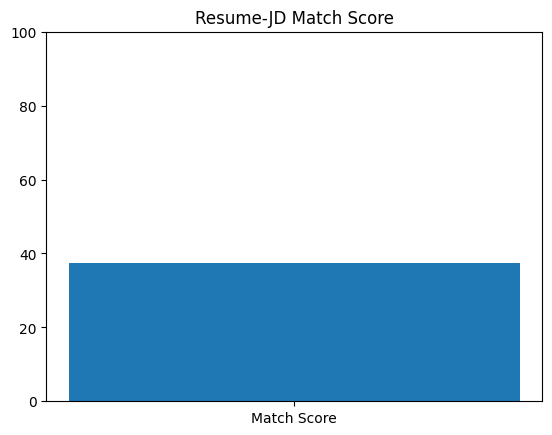

In [31]:
#PHASE 7 — Visualization
plt.bar(["Match Score"], [match_score])
plt.ylim(0,100)
plt.title("Resume-JD Match Score")
plt.show()

In [32]:
#PART 1 — Multiple Resume Ranking
# Ranking Function
def rank_resumes(resume_files, jd_text):
    results = []

    for file in resume_files:
        resume_text = extract_text_from_pdf(file)
        resume_text = clean_text(resume_text)

        score = calculate_match_score(resume_text, jd_text)

        results.append((file, score))

    results.sort(key=lambda x: x[1], reverse=True)

    return results

In [33]:
#Test Ranking
resume_files = ["Black and White Clean Professional A4 Resume.pdf", "Aryan_Mahanty_Resume_Boxed.pdf", "Aryan Mahanty - Resume (1).pdf"]

ranking = rank_resumes(resume_files, jd_text)

for rank, (file, score) in enumerate(ranking, 1):
    print(f"{rank}. {file} - {score:.2f}%")


1. Black and White Clean Professional A4 Resume.pdf - 37.51%
2. Aryan_Mahanty_Resume_Boxed.pdf - 35.58%
3. Aryan Mahanty - Resume (1).pdf - 35.25%


In [34]:
#PART 2 — Experience Weighting
#Step 1 — Experience Extractor
import re
def extract_experience(text):
    match = re.findall(r'(\d+)\s+years', text)
    if match:
        return int(match[0])
    else:
        return 0

In [35]:
#Step 2 — Weighted Score
def weighted_score(match_score, experience):
    exp_weight = min(experience * 2, 20)  # Max 20% boost
    final_score = min(match_score + exp_weight, 100)
    return final_score
experience = extract_experience(resume_text)
final_score = weighted_score(match_score, experience)

print("Final Weighted Score:", final_score)


Final Weighted Score: 37.51


In [36]:
#PART 3 — AI Suggestion System
def generate_suggestions(missing_skills):
    suggestions = []
    
    for skill in missing_skills:
        suggestions.append(f"Consider learning {skill} to improve your match score.")
    
    return suggestions

In [37]:
#PART 4 — Convert To Streamlit Web App
!pip install streamlit
